In [1]:
import torch
import numpy as np
import seaborn as sns 
import multiprocessing as mp
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import main, param, utils

In [2]:
# better graphs
sns.set_style("whitegrid")

# better progressbar
tqdm.pandas() 

# use GPU
if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.cuda.FloatTensor)

In [3]:
# config
stationary = True
data_prefix = "nct_stationary_nc_"
n_trajectories = 1000
n_timepoints = 100 + 1
stresses = [0.1, 0.2, 0.5, 0.7, 1.0, 2.0, 5.0, 7.0, 10.0, 20.0, 50.0, 70.0, 100.0]

In [4]:
# parameters
param.stationary = stationary
param.dim = 1
param.dt = 0.1
param.n_traj = n_trajectories
param.t_init = 0.0
param.t_fin = 10.0
param.x_axis = 0
param.y_axis = 0

param.n_gradient_ascent = 5000
param.which_model = "FNN"
param.which_rep = "Simple"
param.which_estimator = "Var"
param.n_layer = 2

In [5]:
def compute_metrics(stress, seed, compute=True):
    data_id = data_prefix + str(stress)
    estimate_id = data_id + "_seed_" + str(seed)

    # estimate entropy
    if compute:
        _ = main.estimate_entropy(data_id, estimate_id, rand_seed=seed)

    # get metrics
    metrics = utils.get_metrics_ratio(data_id, estimate_id, stress, n_trajectories, n_timepoints, stationary)

    return metrics

In [6]:
# compute metrics over different stress values
all_metrics = []
for stress in tqdm(stresses):
    all_metrics.append(compute_metrics(stress, seed=0))
all_metrics = np.array(all_metrics)


  0%|          | 0/13 [00:00<?, ?it/s]

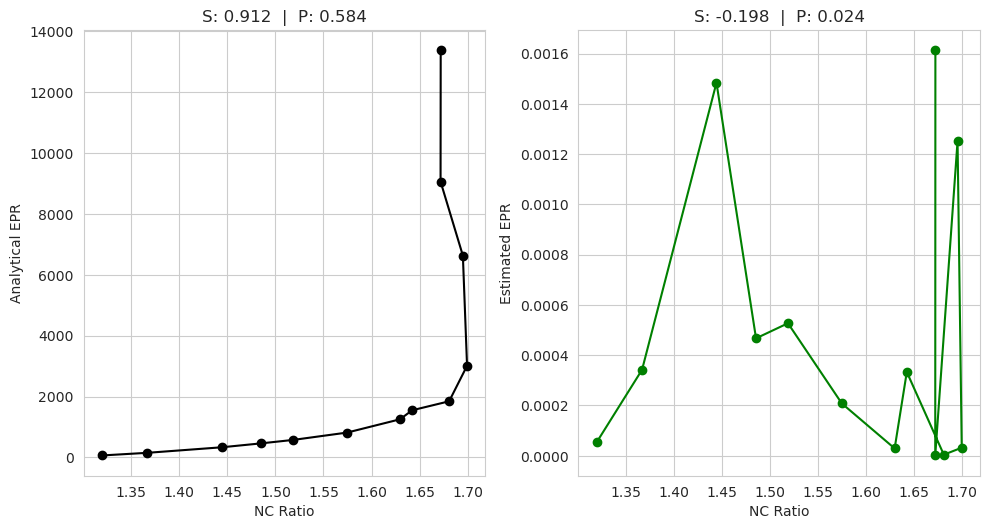

In [7]:
# plot correlation
utils.plot_correlation(all_metrics)

In [8]:
# test seed robustness
seed_metrics = []
for seed in tqdm(range(1, 11)):
    all_metrics = []
    for stress in tqdm(stresses):
        all_metrics.append(compute_metrics(stress, seed=seed))
    all_metrics = np.array(all_metrics)
    seed_metrics.append(utils.compute_estimate_correlation(all_metrics))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

In [9]:
seed_metrics = np.array(seed_metrics)
print(f"Spearman correlation: µ={seed_metrics[:, 0].mean():.2f}, σ={seed_metrics[:, 0].std():.2f}")
print(f"Pearson correlation: µ={seed_metrics[:, 1].mean():.2f}, σ={seed_metrics[:, 1].std():.2f}")

Spearman correlation: µ=-0.01, σ=0.19
Pearson correlation: µ=0.06, σ=0.09
